# Florida Election Data

In this lesson, we will study the general steps required in any machine learning exercise. We will also explore linear regression for single input.

### Load Data

In [1]:
import numpy as np
file = 'http://www.stat.cmu.edu/~larry/all-of-statistics/=Rprograms/florida-election-data.txt'
data = np.genfromtxt(file, delimiter=' ')
print(data)
print(data.shape)

[[  1.00000000e+00   4.73000000e+04   3.40620000e+04 ...,   7.63000000e-01
    2.40000000e-02   2.30000000e-02]
 [  2.00000000e+00   2.39200000e+03   5.61000000e+03 ...,   0.00000000e+00
    3.70000000e-02   3.70000000e-02]
 [  3.00000000e+00   1.88500000e+04   3.86370000e+04 ...,   5.00000000e-03
    6.30000000e-02   3.10000000e-02]
 ..., 
 [  6.50000000e+01   3.83500000e+03   4.51100000e+03 ...,   1.20000000e-02
    7.00000000e-02   0.00000000e+00]
 [  6.60000000e+01   5.63700000e+03   1.21760000e+04 ...,   1.10000000e-02
    9.80000000e-02   3.80000000e-02]
 [  6.70000000e+01   2.79600000e+03   4.98300000e+03 ...,   0.00000000e+00
    6.20000000e-02   1.12000000e-01]]
(67, 22)


### Pre-Processing

In [2]:
bush = data[:,2]
buchanan = data[:,3]
print(bush)
print(buchanan)

[  34062.    5610.   38637.    5413.  115185.  177279.    2873.   35419.
   29744.   41745.   60426.   10964.  289456.    4256.    2698.  152082.
   73029.   12608.    2448.    4750.    3300.    1840.    3546.    2153.
    3764.    4743.   30646.   20196.  176967.    4985.   28627.    9138.
    2481.    1669.   49963.  106141.   39053.    6860.    1316.    3038.
   57948.   55135.   33864.   16059.   16404.   52043.    5058.  134476.
   26216.  152846.   68581.  184312.   90101.   13439.   39497.   34705.
   36248.   83100.   75293.   12126.    8014.    4051.    2326.   82214.
    4511.   12176.    4983.]
[  262.    73.   248.    65.   570.   789.    90.   182.   270.   186.
   122.    89.   561.    36.    29.   650.   504.    83.    33.    39.
    29.     9.    71.    24.    30.    22.   242.    99.   836.    76.
   105.   102.    29.    10.   289.   305.   282.    67.    39.    29.
   272.   563.   108.    47.    90.   267.    43.   446.   145.  3407.
   570.  1010.   538.   147.   2

### Visualization

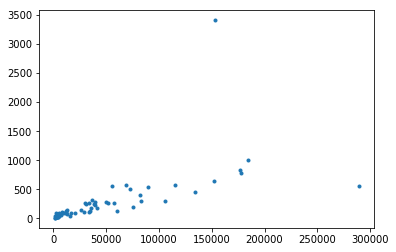

In [3]:
import matplotlib.pyplot as plt
plt.plot(bush, buchanan, '.')
plt.show()

### Feature Engineering

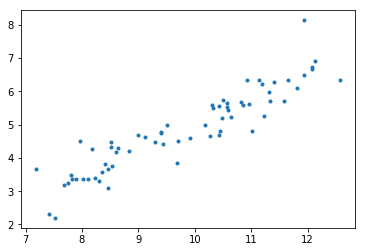

In [4]:
x = np.log(bush)
y = np.log(buchanan)
plt.plot(x, y, '.')
plt.show()

### Model

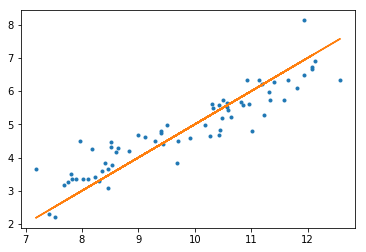

In [5]:
a = 1
b = -5
y_pred = a*x + b
plt.plot(x, y, '.')
plt.plot(x, y_pred)
plt.show()

### Training Data and Test Data

To select a subset from an array, we can use an array of booleans of the same size.

In [6]:
p = np.array([1,2,3,4,5])
primes = np.array([False,True,True,False,True])
print(p[primes])

[2 3 5]


We create a training set with 50 points, and test set with 17 points.

In [7]:
train = np.array([True]*50+[False]*17)
print(train)

np.random.seed(1)
np.random.shuffle(train)
print(train)

test = np.logical_not(train)
print(test)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False]
[False  True False  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True False False False False False False
  True  True  True  True  True  True  True  True  True  True  True False
 False  True False  True False  True  True  True  True False  True  True
  True  True  True  True  True  True  True]
[ True False  True False False False False False False False  True False
  True False False False False False False  True False False False False
  True False False False False False

In [8]:
trainx = x[train]
trainy = y[train]
testx = x[test]
testy = y[test]

print(trainx.shape)
print(testx.shape)
print(trainx)
print(testx)

(50,)
(17,)
[  8.632306     8.59655875  11.65429481  12.08548004   7.96311206
  10.47500368  10.30038271  10.63933496   9.30237246   8.35608503
   7.90026604  11.93217513  11.1986119    9.44208681   7.80302664
   8.10167775   7.51752085   8.17357549   7.6746175    8.46442513
  10.33025743   9.91323984  12.08371855   8.51418868  10.57267498
   8.83346272   7.18235211   8.01895468  10.96730134  10.91754     10.43010778
   9.68402472   9.70528049  10.85982558   8.52872643  11.93718616
  12.12438525   9.50591621  10.58398     10.45463905  10.49813949
  11.22914245   9.40310719   8.98894529   8.30671904   7.75190533
  11.31708088   8.41427414   9.40722208   8.5137874 ]
[ 10.43593767  10.56196565  11.00917475  12.57575858   8.4658999
   8.2332375   10.26210561   9.12019682   7.81641698   7.41997992
  10.81903801  11.57252368  11.80914102  10.17412519  11.13577081
  11.40868654  11.32779998]


### Training Loss

To measure how well a line fits the training data, we use the squared error as a loss function. 
$$ \begin{align}
 & \\
\text{Loss}(z) = \frac{1}{2}z^2\\
& \\
\end{align}
$$
The training loss is then the average loss for the training data.
$$ \begin{align}
 & \\
\mathcal{L}(a,b)&= \frac{1}{n}\sum_{\text{data }(x,y)} \text{Loss}(ax+b-y)\\
&= \frac{1}{n}\sum_{\text{data }(x,y)} \frac{1}{2}(ax+b-y)^2
\end{align}
$$

In [9]:
def loss(z):
    return 1/2*z**2

def train_loss(a, b):
    y_pred = a*trainx + b
    error = y_pred - trainy
    return np.average(loss(error))

print(train_loss(0.8,-3))

0.112101126251


### Gradient

To minimize $\mathcal{L}(a,b)$, we find points $(a,b)$ where the gradient is zero.
$$ \begin{align}
 & \\
\frac{\partial L}{\partial a} &= \frac{1}{n}\sum_{\text{data }(x,y)} (ax+b-y) x \\
&= \left(\frac{1}{n}\sum_{\text{data }(x,y)} x^2\right) a + \left(\frac{1}{n}\sum_{\text{data }(x,y)} x\right) b - \left(\frac{1}{n}\sum_{\text{data }(x,y)} xy\right) = P_{11} a + P_{12} b - Q_1 \\
 & \\
\frac{\partial L}{\partial b} &= \frac{1}{n}\sum_{\text{data }(x,y)} (ax+b-y) \\
&= \left(\frac{1}{n}\sum_{\text{data }(x,y)} x\right) a + \left(\frac{1}{n}\sum_{\text{data }(x,y)} 1\right) b - \left(\frac{1}{n}\sum_{\text{data }(x,y)} y\right) = P_{21} a + P_{22} b - Q_2 
\end{align}
$$

### Least Squares

We want to solve
$$\begin{align}
0=\frac{\partial L}{\partial a} &= P_{11} a + P_{12} b - Q_1 \\
 & \\
0=\frac{\partial L}{\partial b} &= P_{21} a + P_{22} b - Q_2 
\end{align}
$$
which can be written as
$$
P \begin{pmatrix}a \\b \end{pmatrix} = Q,
$$
so the solution is
$$
\hat{\theta}=\begin{pmatrix}\hat{a} \\\hat{b} \end{pmatrix} = P^{-1}Q.
$$

In [10]:
def least_squares(x, y):
    P11 = np.average(x**2)
    P12 = np.average(x)
    P21 = np.average(x)
    P22 = 1
    
    Q1  = np.average(x*y)
    Q2  = np.average(y)

    P = np.array([[P11,P12],[P21,P22]])
    Q = np.array([[Q1],[Q2]])
    
    theta_hat = np.dot(np.linalg.inv(P),Q)
    
    a_hat = theta_hat[0,0]
    b_hat = theta_hat[1,0]
    return a_hat, b_hat

a_hat, b_hat = least_squares(trainx, trainy)
print(a_hat)
print(b_hat)

0.779059466445
-2.72051001785


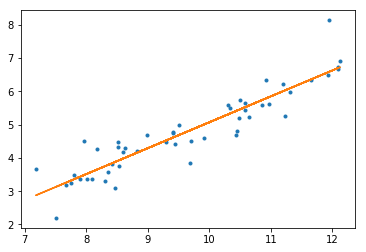

In [11]:
y_pred = a_hat*trainx + b_hat
plt.plot(trainx, trainy, '.')
plt.plot(trainx, y_pred)
plt.show()

The training loss is

In [12]:
print(train_loss(a,b))

0.169025539158


### Test Loss

The test loss is

In [13]:
def test_loss(a, b):
    y_pred = a*testx + b
    error = y_pred - testy
    return np.average(loss(error))

print(test_loss(a_hat,b_hat))

0.108244421628


### Can we do better?

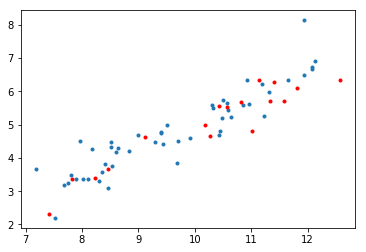

In [14]:
plt.plot(trainx, trainy, '.')
plt.plot(testx, testy, 'r.')
plt.show()

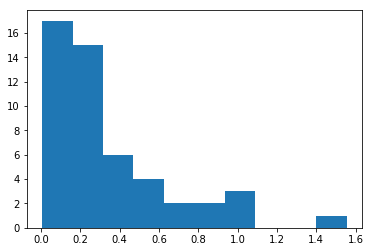

In [15]:
abs_error = abs(a_hat*trainx + b_hat - trainy)
plt.hist(abs_error)
plt.show()

### Removing Outliers

In [16]:
new = abs_error < 1.25
newx = trainx[new]
newy = trainy[new]
print(newx.size)

49


In [17]:
newa_hat,newb_hat = least_squares(newx,newy)
print(test_loss(a_hat,b_hat))
print(test_loss(newa_hat,newb_hat))

0.108244421628
0.0944273807889


In [18]:
print(train_loss(a_hat,b_hat))
print(train_loss(newa_hat,newb_hat))

0.108624916904
0.110699404555
